# Unsupervised Learning : Recommendation using SVD
### Singular value Decomposition

SVD is matrix factorization algorithm which helps us break down very large matrix into 2 other smaller matrix, which will helps us to make predictions. They are broadly classified as:
1. Content based filtering
2. Collabrative based filtering

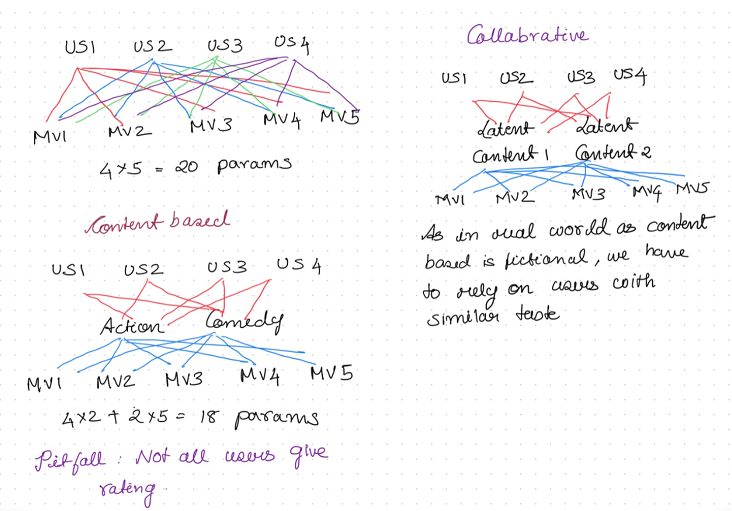

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [2]:
#conda install -c conda-forge scikit-surprise

In [3]:
# Loading Rating Dataset
data = pd.read_csv('.././csv/netflix_movie_rating.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df = pd.DataFrame(data)

In [4]:
df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [6]:
# Loading Movie Title Dataset
data = pd.read_csv('.././csv/movie_titles.csv',encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])
df_title = pd.DataFrame(data)
df_title.set_index('Movie_Id', inplace = True)
df_title.head(5)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [8]:
df.isna().sum()

Cust_Id       0
Rating     4499
dtype: int64

### Cleaning the data
As movie id is present in same column as customer id, it needs to split and kept in seperate column

In [8]:
# Creating Dataframe with all movie id rows
df_nan=pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating']==True].reset_index()

In [9]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [10]:
# Assigning the moveid to relevant index
df['Movie_Id'] = 0
for i in range(1,len(df_nan)):    
    prev_index = df_nan['index'].iloc[i-1]
    curr_index = df_nan['index'].iloc[i]
    df['Movie_Id'].iloc[prev_index:curr_index] = i   
    #print(i   ,prev_index,curr_index)

In [11]:
# Removing the NaN rows as movie id is seperated 
df = df[pd.notnull(df['Rating'])]
# Changing the column to int datatype
df['Movie_Id'] = df['Movie_Id'].astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int32  
 1   Rating    float64
 2   Movie_Id  int32  
dtypes: float64(1), int32(2)
memory usage: 550.5 MB


In [13]:
df.head()

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [14]:
# Removing the inactive records by elminating records < 80 percentile
f = ['count','mean']
for col in ['Cust_Id','Movie_Id']:
    df_cnt = df.groupby(col)['Rating'].agg(f)
    df_cnt.index = df_cnt.index.map(int)
    threshold_val = round(df_cnt['count'].quantile(.8))
    if col == 'Cust_Id':
        df_cust = df_cnt
        cust_drop_id = df_cust [ df_cust['count'] < threshold_val ].index         
    else:
        df_movie = df_cnt
        movie_drop_id = df_movie [ df_movie['count'] < threshold_val ].index      
    print(f'The threshold Value for {col} :',threshold_val)

The threshold Value for Cust_Id : 79
The threshold Value for Movie_Id : 3884


In [15]:
print('Original Shape: {}'.format(df.shape))
df = df[~df['Cust_Id'].isin(cust_drop_id)]    
df = df[~df['Movie_Id'].isin(movie_drop_id)]
print('After Trim Shape: {}'.format(df.shape))

Original Shape: (24053764, 3)
After Trim Shape: (13528427, 3)


In [16]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


### Building the Model

1. The big M * N (C)  matrix is broken down 2 (A,B) matrix. 
2. The matrix C is the dot product of A, B 
3. The gradient decent calulates the error to bring the right values for each cell such that product is close to the existing value
4. After building the matrix A, B, their product is used for filling missing values

### Factorize the matrix

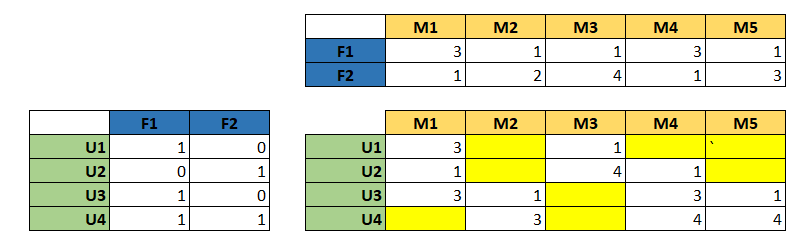

### Calculate the Error and estimate the Weights 
Error = c1,0_(Actual-Predicted)^2 +  c1,1_(Actual-Predicted)^2...+ c4,4_(Actual-Predicted)^2

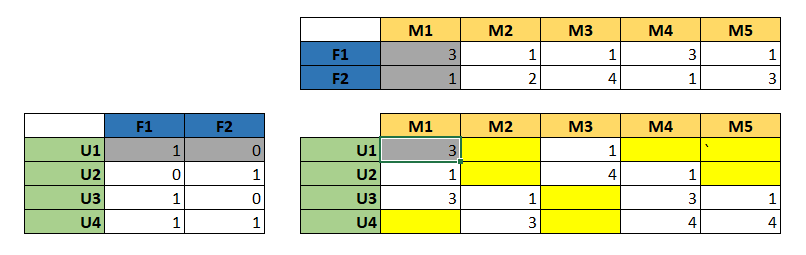

### Make predictions for missing values

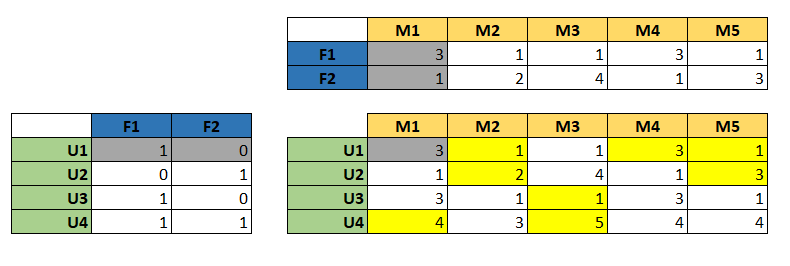

In [18]:
# Reader to read the data
reader = Reader()
# Taking only 100000 for modeling 
data=Dataset.load_from_df(df[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [125]:
# Initiate the Model
model_svd = SVD()
# Check Cross Validation
cross_validate(model_svd,data, measures=['RMSE','MAE'],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9844  0.9826  0.9922  0.9865  0.9803  0.9852  0.0040  
MAE (testset)     0.7934  0.7847  0.8042  0.7983  0.7866  0.7934  0.0072  
Fit time          1.18    1.13    1.18    1.49    1.19    1.24    0.13    
Test time         0.11    0.12    0.11    0.12    0.26    0.15    0.06    


{'test_rmse': array([0.98435479, 0.98259138, 0.99216106, 0.98648415, 0.98028511]),
 'test_mae': array([0.7934027 , 0.78465835, 0.80415551, 0.7982612 , 0.78660845]),
 'fit_time': (1.1824209690093994,
  1.130800485610962,
  1.1819570064544678,
  1.487572193145752,
  1.1945173740386963),
 'test_time': (0.10586404800415039,
  0.12498664855957031,
  0.10932230949401855,
  0.12216949462890625,
  0.26266002655029297)}

### Checking Recommendation for a user
1. For example lets take user 785314 and for which movies she has given 5 Rating
2. Make the index as movie id for traversing the data easily
3. Join the title data to being the movie title name

In [127]:
df_user_785314_liked = df[(df['Cust_Id'] == 785314) & (df['Rating'] == 5)]
df_user_785314_liked = df_user_785314_liked.set_index('Movie_Id')
df_user_785314_liked = df_user_785314_liked.join(df_title)['Name']
print(df_user_785314_liked)

Movie_Id
175                                        Reservoir Dogs
311                                               Ed Wood
329                                                 Dogma
331                                           Chasing Amy
788                                                Clerks
798                                                  Jaws
907                                       Animal Crackers
985                                             The Mummy
1552                                          Black Adder
1905    Pirates of the Caribbean: The Curse of the Bla...
2000                          Four Weddings and a Funeral
2122                                 Being John Malkovich
2342                                        Super Size Me
2360                                  Singin' in the Rain
2430                           Alien: Collector's Edition
2443                             Like Water for Chocolate
2452        Lord of the Rings: The Fellowship of the Ring
2465 

4. Create copy of the title data
5. Reset index to its original
6. Drop the movie id for which less rating was given

In [151]:
df_user_785314_recomended = df_title.copy()
df_user_785314_recomended = df_user_785314_recomended.reset_index()
df_user_785314_recomended = df_user_785314_recomended[~df_user_785314_recomended['Movie_Id'].isin(movie_drop_id)]

7. Take the full data set for searching all movies

In [130]:
full_data = Dataset.load_from_df(df[['Cust_Id','Movie_Id','Rating']],reader)

8. Train the data set

In [137]:
train_data = full_data.build_full_trainset()
model_svd.fit(train_data)

9. Apply recommedation for the user

In [152]:
df_user_785314_recomended['Estimate_score'] = df_user_785314_recomended['Movie_Id'].apply(lambda x: model_svd.predict(785314,x).est)

10. Check the score given to each movie from highest to lowest. therefore we can recommend top 5 movies to this user

In [153]:
df_user_785314_recomended.sort_values('Estimate_score', ascending=False)

,Movie_Id,Year,Name,Estimate_score
787,788,1994.0,Clerks,5.000000
328,329,1999.0,Dogma,4.927549
3520,3521,2000.0,Coupling: Season 1,4.788129
3149,3150,2000.0,Monty Python: The Life of Python,4.662898
3167,3168,1987.0,Evil Dead 2: Dead by Dawn,4.600863
...,...,...,...,...
2778,2779,2003.0,Dr. Seuss' The Cat in the Hat,1.344451
361,362,2000.0,The Flintstones in Viva Rock Vegas,1.128236
3572,3573,1993.0,Cop and a Half,1.082672
1288,1289,1990.0,Look Who's Talking Too,1.071505


### Checking similar genre using Pearson Correlation

In [20]:
# Creating Sparse matrix with user and rating
df_sparse_mat = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')
print(df_sparse_mat.shape)
df_sparse_mat

(95325, 900)


Movie_Id,8,17,18,26,28,30,33,44,46,52,...,4454,4465,4472,4474,4479,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,...,NaN,2.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649285,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2649296,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649308,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [21]:
def recommend_movie(movie_title):
    i = int(df_title.index[df_title['Name']==movie_title][0])
    y = df_sparse_mat[i]
    corr_y = df_sparse_mat.corrwith(y) #applying correlation
    df_recommend_movie = pd.DataFrame(corr_y,columns=['Pearson_R'])
    df_recommend_movie.dropna(inplace=True)
    df_recommend_movie = df_recommend_movie.sort_values('Pearson_R',ascending=False)
    df_recommend_movie.index = df_recommend_movie.index.map(int)
    df_recommend_movie = df_recommend_movie.join(df_title).join(df_movie)[['Pearson_R', 'Name', 'count', 'mean']] 
    print(df_recommend_movie[df_recommend_movie['count']>0][:10].to_string(index=False))

In [25]:
# Similar movies for The 10th Kingdom
recommend_movie("The Twilight Samurai")

 Pearson_R                                       Name  count     mean
  1.000000                       The Twilight Samurai   5098 4.029619
  0.553709                           The 10th Kingdom   4532 3.669903
  0.553452                Northern Exposure: Season 1   5202 4.091503
  0.536375                             My Man Godfrey   4769 3.925980
  0.534760             Curb Your Enthusiasm: Season 3  12148 4.336022
  0.530481                         Farscape: Season 2   4845 4.245820
  0.529799             Farscape: The Peacekeeper Wars   4051 4.302888
  0.526286 The Looney Tunes Golden Collection: Vol. 1   9235 3.952355
  0.511434  Daughter from Danang: American Experience   4785 3.481923
  0.504358                      The Battle of Algiers   5945 4.123802


### References
    https://www.kaggle.com/code/jieyima/netflix-recommendation-collaborative-filtering 
    https://www.youtube.com/watch?v=n3RKsY2H-NE 
    https://www.youtube.com/watch?v=ZspR5PZemcs